# Text Classification Slides - IMDB - Simple

Predict the rating of a review, given it's text.

- Stephen W. Thomas
- Used for MMAI 891 and MMA/GMMA 865.
- Simple version

In [1]:
import pandas as pd

# Read Data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/stepthom/NLP_course/main/data/imdb.small.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10000 non-null  int64 
 1   score   10000 non-null  int64 
 2   rating  10000 non-null  object
 3   en      10000 non-null  object
dtypes: int64(2), object(2)
memory usage: 312.6+ KB


In [3]:
df.head()

,id,score,rating,en
0,5998,1,negative,The basic formula for the original series was...
1,4615,1,negative,I may not have the longest of attention-spans...
2,8429,3,negative,"""Disappointing"" is the best word I could thin..."
3,10453,10,positive,"While traveling by train through Europe, the ..."
4,6941,1,negative,"This movie is not only boring, it is also rea..."


In [4]:
from sklearn.model_selection import train_test_split

X = df['en']
y = df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(8000,)
(2000,)


# Feature Engineering Pipeline

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

# Build a simple Bag of Words representation using CountVectorizer

vectorizer = CountVectorizer(min_df=.01, 
                             max_df=.8, 
                             ngram_range=[1,3], 
                             max_features=300, 
                             stop_words='english')

vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.8, max_features=300, min_df=0.01,
                ngram_range=[1, 3], preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

# Modeling Fitting

In [6]:
from sklearn.tree import DecisionTreeClassifier

# Get features from training data
X_train_features = vectorizer.transform(X_train)

# Train a simple classifier
clf = DecisionTreeClassifier(random_state=223)
clf.fit(X_train_features, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=223, splitter='best')

# Model Assessment

In [7]:
from sklearn.metrics import confusion_matrix, classification_report

# Get features from test data
X_test_features = vectorizer.transform(X_test)

# Use model to make predictions
y_pred = clf.predict(X_test_features)

In [8]:
print(confusion_matrix(y_test, y_pred))

[[702 314]
 [323 661]]


In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.68      0.69      0.69      1016
    positive       0.68      0.67      0.67       984

    accuracy                           0.68      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.68      0.68      0.68      2000



# Model Interpretation

### Feature Importances

In [10]:
feature_names = vectorizer.get_feature_names()
imp = pd.DataFrame({'Feature': feature_names, 'Importance': clf.feature_importances_})
imp = imp.sort_values('Importance', ascending=False)
imp.head(10)

,Feature,Importance
13,bad,0.077297
292,worst,0.050651
111,great,0.036345
277,waste,0.031733
18,best,0.019098
12,awful,0.018403
92,film,0.018128
170,minutes,0.015468
174,movie,0.015401
200,poor,0.011774


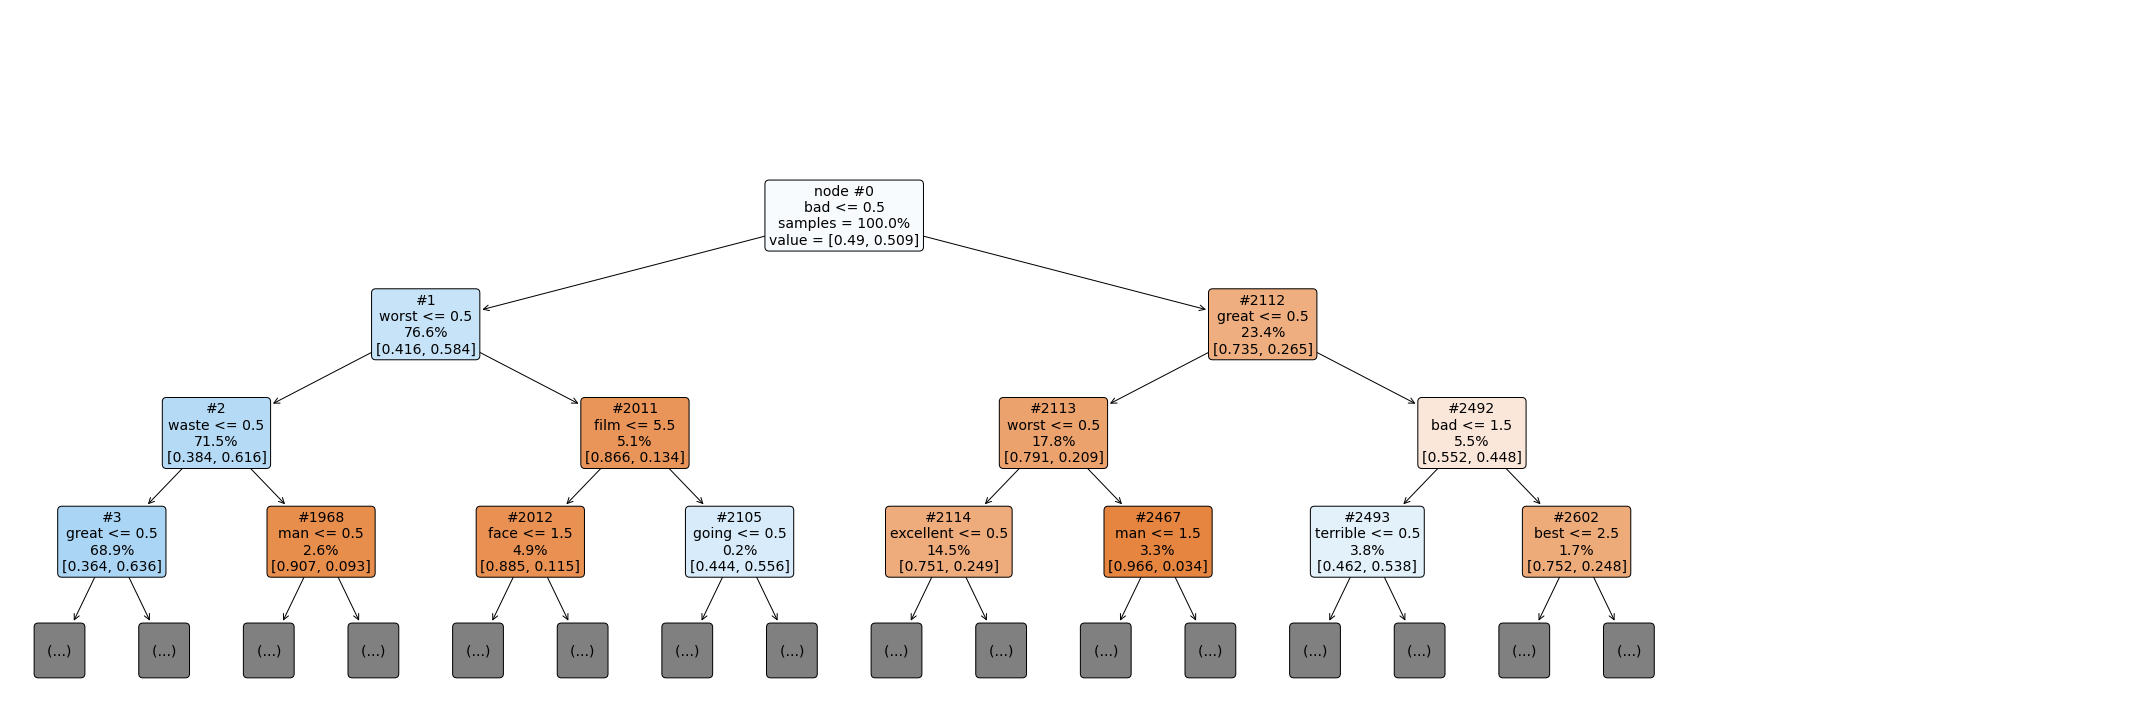

In [12]:
# Needs sklearn 0.21 or higher
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=[30,10]);
plot_tree(clf, filled=True, feature_names = feature_names, 
          label='root', fontsize=14, impurity=False, rounded=True, proportion=True, max_depth=3, node_ids=True);
plt.tight_layout();